In [366]:
import pandas as pd
import scipy.stats as sp
import statsmodels
import statsmodels.stats.multitest
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
baseline = pd.read_csv("nr_baseline_ra_species.csv")
end = pd.read_csv("nr_end_ra_species.csv")
metadata = pd.read_csv("metadata (4).csv")

# 1. Data Preprocessing

Check Missing Values

Subtract dataframes

Separate by food group

Match keys for barley and oats from metadata

Input: Baseline and end datasets

Output: Difference matrix for all 6 foods (broccoli, avocado, walnuts, almonds, oats, barley)

In [367]:
print(baseline.isnull().values.any())
print(end.isnull().values.any())

False
False


There are no missing values in baseline and end

In [368]:
#Create difference matrix
keys = list(baseline["Key"])
cols = list(baseline.columns)
cols.remove("Key")
difference = end[cols]- baseline[cols]

for i in range(len(keys)):
    if (".Baseline" in keys[i]):
        key = keys[i].replace(".Baseline", "")
        keys[i] = key


difference.insert(0, "Key", keys)
difference

/var/folders/p9/x15nwbhs1cg57k146yhh7qcr0000gn/T/ipykernel_14667/3910809273.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  difference.insert(0, "Key", keys)


,Key,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacteriales;f_unclassified Eubacteriales family;g_unclassified Eubacteriales genus;s_unclassified Eubacteriales species,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bacteroidales;f_Bacteroidaceae;g_Bacteroides;s_unclassified Bacteroides species,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bacteroidales;f_unclassified Bacteroidales family;g_unclassified Bacteroidales genus;s_unclassified Bacteroidales species,k_Bacteria;p_Firmicutes;c_unclassified Firmicutes class;o_unclassified Firmicutes order;f_unclassified Firmicutes family;g_unclassified Firmicutes genus;s_unclassified Firmicutes species,k_Bacteria;p_unclassified Bacteria phylum;c_unclassified Bacteria class;o_unclassified Bacteria order;f_unclassified Bacteria family;g_unclassified Bacteria genus;s_unclassified Bacteria species,k_unclassified unclassified entries superkingdom;p_unclassified unclassified entries phylum;c_unclassified unclassified entries class;o_unclassified unclassified entries order;f_unclassified unclassified entries family;g_unclassified unclassified entries genus;s_unclassified unclassified entries species,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacteriales;f_Lachnospiraceae;g_unclassified Lachnospiraceae genus;s_unclassified Lachnospiraceae species,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacteriales;f_Oscillospiraceae;g_Faecalibacterium;s_unclassified Faecalibacterium species,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacteriales;f_Oscillospiraceae;g_Ruminococcus;s_unclassified Ruminococcus species,...,k_Viruses;p_Uroviricota;c_unclassified Uroviricota class;o_unclassified Uroviricota order;f_unclassified Uroviricota family;g_unclassified Uroviricota genus;s_unclassified Uroviricota species,k_Viruses;p_Uroviricota;c_Caudoviricetes;o_unclassified Caudoviricetes order;f_unclassified Caudoviricetes family;g_unclassified Caudoviricetes genus;s_unclassified Caudoviricetes species,k_Viruses;p_Uroviricota;c_Caudoviricetes;o_Caudovirales;f_Siphoviridae;g_Pahexavirus;s_unclassified Pahexavirus species,k_Viruses;p_Uroviricota;c_Caudoviricetes;o_Caudovirales;f_Siphoviridae;g_Pahexavirus;s_Propionibacterium phage QueenBey,k_Viruses;p_Phixviricota;c_unclassified Phixviricota class;o_unclassified Phixviricota order;f_unclassified Phixviricota family;g_unclassified Phixviricota genus;s_unclassified Phixviricota species,k_Viruses;p_Phixviricota;c_Malgrandaviricetes;o_unclassified Malgrandaviricetes order;f_unclassified Malgrandaviricetes family;g_unclassified Malgrandaviricetes genus;s_unclassified Malgrandaviricetes species,k_Viruses;p_Phixviricota;c_Malgrandaviricetes;o_Petitvirales;f_unclassified Petitvirales family;g_unclassified Petitvirales genus;s_unclassified Petitvirales species,k_Viruses;p_Phixviricota;c_Malgrandaviricetes;o_Petitvirales;f_Microviridae;g_unclassified Microviridae genus;s_Microviridae sp.,k_Viruses;p_Uroviricota;c_Caudoviricetes;o_Caudovirales;f_Myoviridae;g_unclassified Myoviridae genus;s_Phage DP SC_6_H4_2017,k_Viruses;p_unclassified Viruses phylum;c_unclassified Viruses class;o_unclassified Viruses order;f_unclassified Viruses family;g_unclassified Viruses genus;s_Phage DP-2017a
0,041.NoAvocado,-0.073416,-0.011339,-0.015493,-0.015781,0.003587,-0.003166,-0.007278,-0.016424,-0.003136,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,046.Avocado,0.037416,0.001285,-0.009488,0.010976,-0.016729,0.008597,0.005168,0.007270,0.002178,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,047.Avocado,-0.041373,0.110718,-0.014138,-0.011388,-0.003358,0.000112,-0.013391,0.010866,-0.000862,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,048.NoAvocado,0.087229,-0.107819,-0.047342,0.019066,-0.012523,-0.010503,0.023360,0.022284,0.003249,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,050.Avocado,-0.003758,-0.008572,-0.023165,0.006651,-0.010369,-0.014614,0.000501,0.019992,0.001652,...,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,4915.NoBroccoli,-0.072818,0.180195,0.021219,-0.019496,-0.010263,-0.012841,0.005631,-0.0

We will create the following new dataframes:

difference represents the change between baseline and end

difference_matrix_avocado

difference_matrix_no_avocado


difference_matrix_broccoli

difference_matrix_no_broccoli


difference_matrix_barley

difference_matrix_no_grains

difference_matrix_oats

difference_matrix_no_grains


difference_matrix_almonds

difference_matrix_no_almonds


difference_matrix_walnuts

difference_matrix_no_walnuts

In [369]:
difference_matrix_no_avocado = difference[difference["Key"].str.contains(".NoAvocado")]
difference = pd.concat([difference,difference_matrix_no_avocado, difference_matrix_no_avocado]).drop_duplicates(keep=False)
difference_matrix_avocado = difference[difference["Key"].str.contains(".Avocado")].head(n = 20)

difference = pd.concat([difference,difference_matrix_avocado, difference_matrix_avocado]).drop_duplicates(keep=False)

difference_matrix_no_broccoli = difference[difference["Key"].str.contains(".NoBroccoli")]
difference = pd.concat([difference,difference_matrix_no_broccoli, difference_matrix_no_broccoli]).drop_duplicates(keep=False)
difference_matrix_broccoli = difference[difference["Key"].str.contains(".Broccoli")]

difference = pd.concat([difference,difference_matrix_broccoli, difference_matrix_broccoli]).drop_duplicates(keep=False)

difference_matrix_no_almonds = difference[difference["Key"].str.contains(".NoAlmond")]
difference = pd.concat([difference,difference_matrix_no_almonds, difference_matrix_no_almonds]).drop_duplicates(keep=False)
difference_matrix_almonds = difference[difference["Key"].str.contains(".Almond")]

difference = pd.concat([difference,difference_matrix_almonds, difference_matrix_almonds]).drop_duplicates(keep=False)

difference_matrix_no_walnuts = difference[difference["Key"].str.contains(".NoWalnut")]
difference = pd.concat([difference,difference_matrix_no_walnuts, difference_matrix_no_walnuts]).drop_duplicates(keep=False)
difference_matrix_walnuts = difference[difference["Key"].str.contains(".Walnut")]

difference = pd.concat([difference,difference_matrix_walnuts, difference_matrix_walnuts]).drop_duplicates(keep=False)

difference_matrix_no_grains = difference[difference["Key"].str.contains(".NoGrains")]
difference = pd.concat([difference,difference_matrix_no_grains, difference_matrix_no_grains]).drop_duplicates(keep=False)
difference_matrix_grains = difference[difference["Key"].str.contains(".Grains")]

difference = pd.concat([difference,difference_matrix_grains, difference_matrix_grains]).drop_duplicates(keep=False)

In [370]:
#Get keys for barley and oats from metadata
barley = metadata[metadata["Treatment2"] == "Barley"]["Key"].tolist()
oats = metadata[metadata["Treatment2"] == "Oats"]["Key"].tolist()
for i in range(len(barley)):
    barley[i] = barley[i][0:4]
for i in range(len(oats)):
    oats[i] = oats[i][0:4]
oats = list(set(oats))
barley = list(set(barley))

In [371]:
#Create difference matrices for barley and oats
difference_matrix_oats = pd.DataFrame(columns = difference_matrix_grains.columns)
for index, row in difference_matrix_grains.iterrows():
    for key in oats:
        if key in row["Key"]:
            difference_matrix_oats = difference_matrix_oats.append(row, ignore_index = True)


difference_matrix_barley = pd.DataFrame(columns = difference_matrix_grains.columns)
for index, row in difference_matrix_grains.iterrows():
    for key in barley:
        if key in row["Key"]:
            difference_matrix_barley = difference_matrix_barley.append(row, ignore_index = True)


#Add oats label to key in oats difference matrix
keys = difference_matrix_oats["Key"].tolist()
for i in range(len(keys)):
    keys[i] = keys[i] + "Oats"
difference_matrix_oats["Key"] = keys


#Add barley label to key in barley difference matrix
keys = difference_matrix_barley["Key"].tolist()
for i in range(len(keys)):
    keys[i] = keys[i] + "Barley"
difference_matrix_barley["Key"] = keys

/var/folders/p9/x15nwbhs1cg57k146yhh7qcr0000gn/T/ipykernel_14667/411224911.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  difference_matrix_oats = difference_matrix_oats.append(row, ignore_index = True)
/var/folders/p9/x15nwbhs1cg57k146yhh7qcr0000gn/T/ipykernel_14667/411224911.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  difference_matrix_oats = difference_matrix_oats.append(row, ignore_index = True)
/var/folders/p9/x15nwbhs1cg57k146yhh7qcr0000gn/T/ipykernel_14667/411224911.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  difference_matrix_oats = difference_matrix_oats.append(row, ignore_index = True)
/var/folders/p9/x15nwbhs1cg57k146yhh7qcr0000gn/T/ipykernel_14667/411224911.py:6: FutureWarning: The frame.app

## 2. Significant Taxa

In [372]:
#1. Significant Taxa for broccoli using kruskal without FDR, top 20 significant taxa
pval = pd.DataFrame()
for (columnName, columnData) in difference_matrix_no_broccoli.iteritems():
    if columnName != 'Key':
        if (list(difference_matrix_no_broccoli[columnName].dropna()) != list(difference_matrix_broccoli[columnName].dropna())):
            ex = stats.kruskal(difference_matrix_no_broccoli[columnName].dropna(),difference_matrix_broccoli[columnName].dropna())
            temp = pd.DataFrame({'Feature':columnName,'p-value':ex.pvalue}, index = [0])
        else:
            temp = pd.DataFrame({'Feature':columnName,'p-value':1}, index = [0])

        pval = pd.concat([pval, temp])

pval = pval.reset_index(drop = True)
pval = pval.dropna()
broccoli_p_values = pval[pval["p-value"] < 0.05].sort_values(by="p-value", ascending = True)
print("Significant Taxa with p value less than 0.05 for broccoli: ", len(broccoli_p_values["Feature"].tolist()))
broccoli_p_values = broccoli_p_values.head(n = 20)
broccoli_p_values

Significant Taxa with p value less than 0.05 for broccoli:  88


,Feature,p-value
139,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000006
158,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000016
26,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000018
174,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000020
36,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000044
33,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000044
41,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000089
0,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000147
38,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_E...,0.000242
116,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000326


In [373]:
#2. Significant Taxa for avocado using kruskal without FDR, top 20 significant taxa
pval = pd.DataFrame()
for (columnName, columnData) in difference_matrix_no_avocado.iteritems():
    if columnName != 'Key':
        if (list(difference_matrix_no_avocado[columnName].dropna()) != list(difference_matrix_avocado[columnName].dropna())):
            ex = stats.kruskal(difference_matrix_no_avocado[columnName].dropna(),difference_matrix_avocado[columnName].dropna())
            temp = pd.DataFrame({'Feature':columnName,'p-value':ex.pvalue}, index = [0])
        else:
            temp = pd.DataFrame({'Feature':columnName,'p-value':1}, index = [0])

        pval = pd.concat([pval, temp])

pval = pval.reset_index(drop = True)
pval = pval.dropna()
avocado_p_values = pval[pval["p-value"] < 0.05].sort_values(by="p-value", ascending = True)
print("Significant Taxa with p value less than 0.05 for avocado: ", len(avocado_p_values["Feature"].tolist()))
avocado_p_values = avocado_p_values.head(n = 20)
avocado_p_values

Significant Taxa with p value less than 0.05 for avocado:  32


,Feature,p-value
113,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.004210
245,k_Bacteria;p_Proteobacteria;c_Gammaproteobacte...,0.005956
228,k_Bacteria;p_Proteobacteria;c_Gammaproteobacte...,0.012301
177,k_Bacteria;p_Proteobacteria;c_Alphaproteobacte...,0.014765
230,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_E...,0.014860
408,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.023851
168,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.023851
108,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.026451
283,k_Bacteria;p_Firmicutes;c_Bacilli;o_Lactobacil...,0.028299
17,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.028443


In [374]:
#3. Significant Taxa for walnuts using kruskal without FDR, top 20 significant taxa
pval = pd.DataFrame()
for (columnName, columnData) in difference_matrix_no_walnuts.iteritems():
    if columnName != 'Key':
        if (list(difference_matrix_no_walnuts[columnName].dropna()) != list(difference_matrix_walnuts[columnName].dropna())):
            ex = stats.kruskal(difference_matrix_no_walnuts[columnName].dropna(),difference_matrix_walnuts[columnName].dropna())
            temp = pd.DataFrame({'Feature':columnName,'p-value':ex.pvalue}, index = [0])
        else:
            temp = pd.DataFrame({'Feature':columnName,'p-value':1}, index = [0])

        pval = pd.concat([pval, temp])

pval = pval.reset_index(drop = True)
pval = pval.dropna()
walnuts_p_values = pval[pval["p-value"] < 0.05].sort_values(by="p-value", ascending = True)
print("Significant Taxa with p value less than 0.05 for walnuts:" ,len(walnuts_p_values["Feature"].tolist()))
walnuts_p_values = walnuts_p_values.head(n = 20)
walnuts_p_values

Significant Taxa with p value less than 0.05 for walnuts: 66


,Feature,p-value
117,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000147
0,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000310
2,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.000633
32,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000894
13,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.001232
187,k_Bacteria;p_Firmicutes;c_Negativicutes;o_uncl...,0.001396
103,k_Bacteria;p_Actinobacteria;c_Coriobacteriia;o...,0.001730
223,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.002650
1079,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_u...,0.002742
610,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.002904


In [375]:
#4. Significant Taxa for almonds using kruskal without FDR, top 20 significant taxa
pval = pd.DataFrame()
for (columnName, columnData) in difference_matrix_no_almonds.iteritems():
    if columnName != 'Key':
        if (list(difference_matrix_no_almonds[columnName].dropna()) != list(difference_matrix_almonds[columnName].dropna())):
            ex = stats.kruskal(difference_matrix_no_almonds[columnName].dropna(),difference_matrix_almonds[columnName].dropna())
            temp = pd.DataFrame({'Feature':columnName,'p-value':ex.pvalue}, index = [0])
        else:
            temp = pd.DataFrame({'Feature':columnName,'p-value':1}, index = [0])

        pval = pd.concat([pval, temp])

pval = pval.reset_index(drop = True)
pval = pval.dropna()
almonds_p_values = pval[pval["p-value"] < 0.05].sort_values(by="p-value", ascending = True)
print("Significant Taxa with p value less than 0.05 for almonds:" ,len(almonds_p_values["Feature"].tolist()))
almonds_p_values = almonds_p_values.head(n = 20)
almonds_p_values


Significant Taxa with p value less than 0.05 for almonds: 48


,Feature,p-value
360,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.000242
71,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.001139
394,k_Bacteria;p_Proteobacteria;c_Betaproteobacter...,0.001214
19,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.003020
111,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.003804
60,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.004476
716,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.006383
283,k_Bacteria;p_Firmicutes;c_Bacilli;o_Lactobacil...,0.007465
220,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.008297
29,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.008435


In [376]:
#5. Significant Taxa for barley using kruskal without FDR, top 20 significant taxa
pval = pd.DataFrame()
for (columnName, columnData) in difference_matrix_no_grains.iteritems():
    if columnName != 'Key':
        if (list(difference_matrix_no_grains[columnName].dropna()) != list(difference_matrix_barley[columnName].dropna())):
            ex = stats.kruskal(difference_matrix_no_grains[columnName].dropna(),difference_matrix_barley[columnName].dropna())
            temp = pd.DataFrame({'Feature':columnName,'p-value':ex.pvalue}, index = [0])
        else:
            temp = pd.DataFrame({'Feature':columnName,'p-value':1}, index = [0])

        pval = pd.concat([pval, temp])

pval = pval.reset_index(drop = True)
pval = pval.dropna()
barley_p_values = pval[pval["p-value"] < 0.05].sort_values(by="p-value", ascending = True)
print("Significant Taxa with p value less than 0.05 for barley: ", len(barley_p_values["Feature"].tolist()))
barley_p_values = barley_p_values.head(n = 20)
barley_p_values

Significant Taxa with p value less than 0.05 for barley:  25


,Feature,p-value
14,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000533
40,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.001290
168,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.002303
57,k_Bacteria;p_Actinobacteria;c_Coriobacteriia;o...,0.003943
188,k_Bacteria;p_Actinobacteria;c_Coriobacteriia;o...,0.005594
199,k_Bacteria;p_Firmicutes;c_Bacilli;o_unclassifi...,0.005810
77,k_Bacteria;p_Proteobacteria;c_Gammaproteobacte...,0.008413
403,k_Bacteria;p_Actinobacteria;c_Actinomycetia;o_...,0.010158
42,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.011385
244,k_Bacteria;p_Actinobacteria;c_Coriobacteriia;o...,0.012093


In [377]:
#6. Significant Taxa for oats using kruskal without FDR, top 20 significant taxa
pval = pd.DataFrame()
for (columnName, columnData) in difference_matrix_no_grains.iteritems():
    if columnName != 'Key':
        if (list(difference_matrix_no_grains[columnName].dropna()) != list(difference_matrix_oats[columnName].dropna())):
            ex = stats.kruskal(difference_matrix_no_grains[columnName].dropna(),difference_matrix_oats[columnName].dropna())
            temp = pd.DataFrame({'Feature':columnName,'p-value':ex.pvalue}, index = [0])
        else:
            temp = pd.DataFrame({'Feature':columnName,'p-value':1}, index = [0])

        pval = pd.concat([pval, temp])

pval = pval.reset_index(drop = True)
pval = pval.dropna()
oats_p_values = pval[pval["p-value"] < 0.05].sort_values(by="p-value", ascending = True)
print("Significant Taxa with p value less than 0.05 for oats: ", len(oats_p_values["Feature"].tolist()))
oats_p_values = oats_p_values.head(n = 20)
oats_p_values

Significant Taxa with p value less than 0.05 for oats:  14


,Feature,p-value
230,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_E...,0.002478
226,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.009286
741,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_E...,0.023341
93,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.027529
36,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.032670
158,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.032670
280,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.035248
659,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_E...,0.035248
762,k_Bacteria;p_Firmicutes;c_Bacilli;o_Bacillales...,0.035248
193,k_Bacteria;p_Proteobacteria;c_Deltaproteobacte...,0.035917


## 3. Random Forest Model

1. Model for two foods (broccoli and walnuts) 

2. Model for four foods (broccoli, walnuts, almonds, avocados)

3. Model for five foods (broccoli, walnuts, almonds, avocados, barley)

4. Model for all six foods (broccoli, walnuts, almonds, avocados, barley, and oats)

In [378]:
#Prepare dataset for two food random forest model
two_foods = pd.concat([difference_matrix_broccoli, difference_matrix_walnuts])
keys = two_foods["Key"].tolist()
class_names = []
for key in keys:
    if "Broccoli" in key:
        class_names.append("Broccoli")
    if "Walnut" in key:
        class_names.append("Walnut")
significant_columns = list(set(walnuts_p_values["Feature"].tolist() + broccoli_p_values["Feature"].tolist()))
two_foods = two_foods[significant_columns]
two_foods.insert(0, "Class", class_names)
two_foods.reset_index(drop = True, inplace = True)

<Figure size 432x288 with 0 Axes>

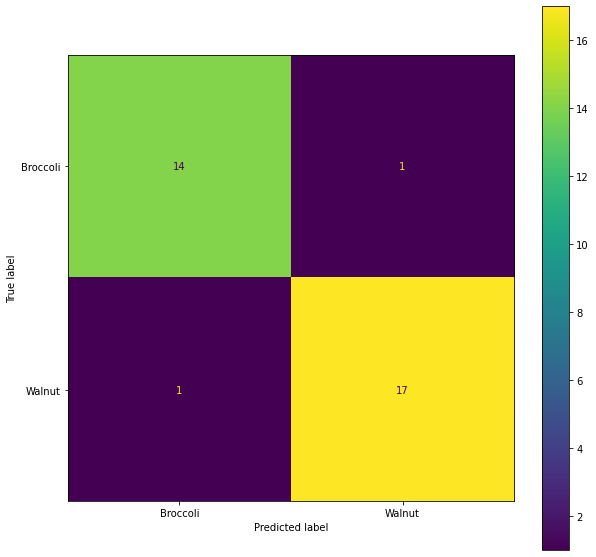

In [379]:
#Build and evaluate random forest model for two foods (broccoli and walnuts)
X = two_foods.drop(['Class'], axis = 1)
y = two_foods["Class"]
model = RandomForestClassifier()
model.fit(X, y)
cv = LeaveOneOut()
scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
fig = plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))

disp.plot(ax = ax)
plt.show()
fig.savefig('two_foods_confusion_matrix.png')


In [380]:
#Feature Importance for two food model
feature_importance = {'Taxa':significant_columns, 'Feature Importance':model.feature_importances_}
importances = pd.DataFrame.from_dict(feature_importance)
importances = importances.sort_values(by = ["Feature Importance"], ascending = False)
importances

,Taxa,Feature Importance
32,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.105376
8,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.090697
35,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.083064
24,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.067680
9,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.059747
17,k_Bacteria;p_Firmicutes;c_unclassified Firmicu...,0.057728
25,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.053940
22,k_Bacteria;p_Bacteroidetes;c_unclassified Bact...,0.049770
2,k_Bacteria;p_Actinobacteria;c_Actinomycetia;o_...,0.044874
15,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.042329


In [381]:
two_foods_feature_dictionary = {}

top_features_two_foods = importances.head(n = 23)["Taxa"].tolist()
top_features_two_foods_importances = importances.head(n = 23)["Feature Importance"].tolist()
two_foods_rank = []
for i in range(1, 24):
    two_foods_rank.append(i)


for i in range(len(top_features_two_foods)):
    two_foods_feature_dictionary[top_features_two_foods[i]] = [two_foods_rank[i], top_features_two_foods_importances[i]]

In [382]:
#Prepare dataset for four food random forest model
four_foods = pd.concat([difference_matrix_broccoli, difference_matrix_walnuts, difference_matrix_almonds, difference_matrix_avocado])
keys = four_foods["Key"].tolist()
class_names = []
for key in keys:
    if "Broccoli" in key:
        class_names.append("Broccoli")
    if "Walnut" in key:
        class_names.append("Walnut")
    if "Almond" in key:
        class_names.append("Almond")
    if "Avocado" in key:
        class_names.append("Avocado")
significant_columns = list(set(walnuts_p_values["Feature"].tolist() + broccoli_p_values["Feature"].tolist() + almonds_p_values["Feature"].tolist() + avocado_p_values["Feature"].tolist()))
four_foods = four_foods[significant_columns]
four_foods.insert(0, "Class", class_names)
four_foods.reset_index(drop = True, inplace = True)

<Figure size 432x288 with 0 Axes>

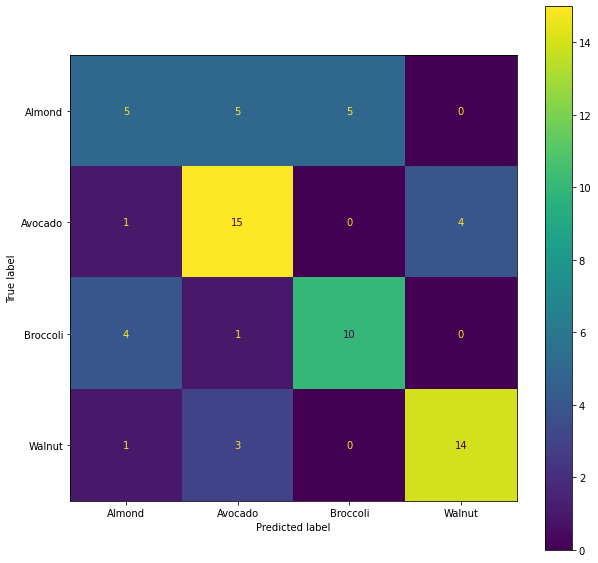

In [383]:
#Build and evaluate random forest model for four foods (broccoli, walnuts, almonds, and avocados)
X = four_foods.drop(['Class'], axis = 1)
y = four_foods["Class"]
model = RandomForestClassifier()
model.fit(X, y)
cv = LeaveOneOut()
scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
fig = plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax = ax)
plt.show()
fig.savefig('four_foods_confusion_matrix.png')



In [384]:
#Feature Importance table for 4 food model
feature_importance = {'Taxa':significant_columns, 'Feature Importance':model.feature_importances_}
importances = pd.DataFrame.from_dict(feature_importance)
importances = importances.sort_values(by = ["Feature Importance"], ascending = False)
importances

,Taxa,Feature Importance
64,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.041456
22,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.039308
52,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.036656
57,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.035701
45,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.034400
...,...,...
2,k_Bacteria;p_Proteobacteria;c_Gammaproteobacte...,0.001026
29,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000997
11,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000814
66,k_Bacteria;p_Firmicutes;c_Bacilli;o_Lactobacil...,0.000533


In [385]:
four_foods_feature_dictionary = {}

top_features_four_foods = importances.head(n = 23)["Taxa"].tolist()
top_features_four_foods_importances = importances.head(n = 23)["Feature Importance"].tolist()
four_foods_rank = []
for i in range(1, 24):
    four_foods_rank.append(i)


for i in range(len(top_features_four_foods)):
    four_foods_feature_dictionary[top_features_four_foods[i]] = [four_foods_rank[i], top_features_four_foods_importances[i]]

In [386]:
#Prepare dataset for five food random forest model
five_foods = pd.concat([difference_matrix_broccoli, difference_matrix_walnuts, difference_matrix_almonds, difference_matrix_avocado, difference_matrix_barley])
keys = five_foods["Key"].tolist()
class_names = []
for key in keys:
    if "Broccoli" in key:
        class_names.append("Broccoli")
    if "Walnut" in key:
        class_names.append("Walnut")
    if "Almond" in key:
        class_names.append("Almond")
    if "Avocado" in key:
        class_names.append("Avocado")
    if "Barley" in key:
        class_names.append("Barley")
significant_columns = list(set(walnuts_p_values["Feature"].tolist() + broccoli_p_values["Feature"].tolist() + almonds_p_values["Feature"].tolist() + avocado_p_values["Feature"].tolist() + barley_p_values["Feature"].tolist()))
five_foods = five_foods[significant_columns]
five_foods.insert(0, "Class", class_names)
five_foods.reset_index(drop = True, inplace = True)

<Figure size 432x288 with 0 Axes>

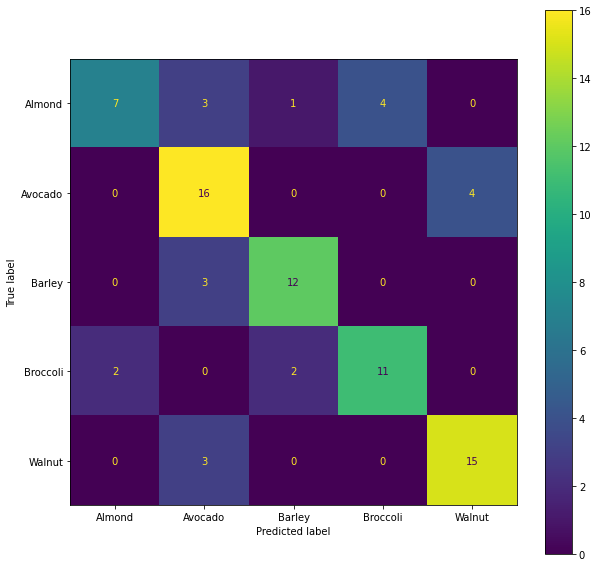

In [387]:
#Build and evaluate random forest model for five foods (broccoli, walnuts, almonds, avocados, and barley)
X = five_foods.drop(['Class'], axis = 1)
y = five_foods["Class"]
model = RandomForestClassifier()
model.fit(X, y)
cv = LeaveOneOut()
scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
fig = plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax = ax)
plt.show()
fig.savefig('five_foods_confusion_matrix.png')


In [388]:
#Feature Importance Table for 5 food model
feature_importance = {'Taxa':significant_columns, 'Feature Importance':model.feature_importances_}
importances = pd.DataFrame.from_dict(feature_importance)
importances = importances.sort_values(by = ["Feature Importance"], ascending = False)
importances

,Taxa,Feature Importance
19,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.039189
78,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.034372
34,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.033874
20,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.031738
87,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.029473
...,...,...
25,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000294
10,k_Bacteria;p_Proteobacteria;c_Betaproteobacter...,0.000276
27,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000000
22,k_Bacteria;p_Firmicutes;c_Bacilli;o_Bacillales...,0.000000


In [389]:
five_foods_feature_dictionary = {}

top_features_five_foods = importances.head(n = 23)["Taxa"].tolist()
top_features_five_foods_importances = importances.head(n = 23)["Feature Importance"].tolist()
five_foods_rank = []
for i in range(1, 24):
    five_foods_rank.append(i)


for i in range(len(top_features_five_foods)):
    five_foods_feature_dictionary[top_features_five_foods[i]] = [five_foods_rank[i], top_features_five_foods_importances[i]]

In [390]:
#Prepare dataset for six food random forest model (broccoli, walnuts, almonds, avocados, barley, oats)
six_foods = pd.concat([difference_matrix_broccoli, difference_matrix_walnuts, difference_matrix_almonds, difference_matrix_avocado, difference_matrix_barley, difference_matrix_oats])
keys = six_foods["Key"].tolist()
class_names = []
for key in keys:
    if "Broccoli" in key:
        class_names.append("Broccoli")
    if "Walnut" in key:
        class_names.append("Walnut")
    if "Almond" in key:
        class_names.append("Almond")
    if "Avocado" in key:
        class_names.append("Avocado")
    if "Barley" in key:
        class_names.append("Barley")
    if "Oats" in key:
        class_names.append("Oats")
significant_columns = list(set(walnuts_p_values["Feature"].tolist() + broccoli_p_values["Feature"].tolist() + almonds_p_values["Feature"].tolist() + avocado_p_values["Feature"].tolist() + barley_p_values["Feature"].tolist() + oats_p_values["Feature"].tolist()))
six_foods = six_foods[significant_columns]
six_foods.insert(0, "Class", class_names)
six_foods.reset_index(drop = True, inplace = True)

<Figure size 432x288 with 0 Axes>

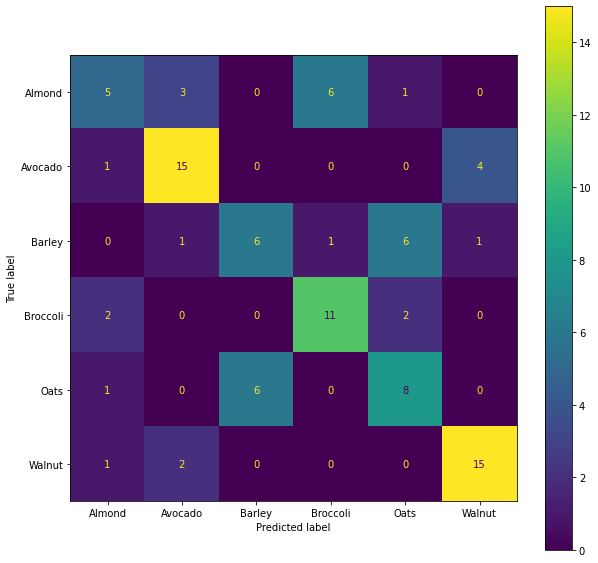

In [391]:
#Build and evaluate random forest model for six foods (broccoli, walnuts, almonds, avocados, barley, and oats)
X = six_foods.drop(['Class'], axis = 1)
y = six_foods["Class"]
model = RandomForestClassifier()
model.fit(X, y)
cv = LeaveOneOut()
scores = cross_val_score(model, X, y,
                         cv=cv, n_jobs=-1)

y_pred = cross_val_predict(model, X, y, cv=cv)
conf_mat = confusion_matrix(y, y_pred)
fig = plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax = ax)
plt.show()
fig.savefig('six_foods_confusion_matrix.png')


In [392]:
#Feature importance table for 6 food model
feature_importance = {'Taxa':significant_columns, 'Feature Importance':model.feature_importances_}
importances = pd.DataFrame.from_dict(feature_importance)
importances = importances.sort_values(by = ["Feature Importance"], ascending = False)
importances

,Taxa,Feature Importance
87,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.036435
76,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,0.035256
85,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.032937
86,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.029488
21,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.027787
...,...,...
27,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000646
6,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,0.000399
24,k_Bacteria;p_Firmicutes;c_Bacilli;o_Bacillales...,0.000228
61,k_Bacteria;p_Firmicutes;c_Erysipelotrichia;o_u...,0.000219


In [393]:
# Create dictionary of taxa to rank and feature importance
six_foods_feature_dictionary = {}

top_features_six_foods = importances.head(n = 23)["Taxa"].tolist()
top_features_six_foods_importances = importances.head(n = 23)["Feature Importance"].tolist()
six_foods_rank = []
for i in range(1, 24):
    six_foods_rank.append(i)


for i in range(len(top_features_six_foods)):
    six_foods_feature_dictionary[top_features_six_foods[i]] = [five_foods_rank[i], top_features_six_foods_importances[i]]

# 4. Final Feature Table

In [394]:
final_feature_table = pd.DataFrame(columns = ["Taxa", "Two Foods Rank", "Two Foods Importance", "Four Foods Rank", "Four Foods Importance"
, "Five Foods Rank", "Five Foods Importance", "Six Foods Rank", "Six Foods Importance"])

In [395]:
all_significant_taxa = list(set(top_features_two_foods + top_features_four_foods + top_features_five_foods + top_features_six_foods))

two_foods_importance_col = []
two_foods_rank_col = []

four_foods_importance_col = []
four_foods_rank_col = []

five_foods_importance_col = []
five_foods_rank_col = []

six_foods_importance_col = []
six_foods_rank_col = []

for elem in all_significant_taxa:
    if elem in top_features_two_foods:
        two_foods_rank_col.append(two_foods_feature_dictionary[elem][0])
        two_foods_importance_col.append(two_foods_feature_dictionary[elem][1])
    else:
        two_foods_rank_col.append("NA")
        two_foods_importance_col.append("NA")

    if elem in top_features_four_foods:
        four_foods_rank_col.append(four_foods_feature_dictionary[elem][0])
        four_foods_importance_col.append(four_foods_feature_dictionary[elem][1])
    else:
        four_foods_rank_col.append("NA")
        four_foods_importance_col.append("NA")

    if elem in top_features_five_foods:
        five_foods_rank_col.append(five_foods_feature_dictionary[elem][0])
        five_foods_importance_col.append(five_foods_feature_dictionary[elem][1])
    else:
        five_foods_rank_col.append("NA")
        five_foods_importance_col.append("NA")

    if elem in top_features_six_foods:
        six_foods_rank_col.append(six_foods_feature_dictionary[elem][0])
        six_foods_importance_col.append(six_foods_feature_dictionary[elem][1])
    else:
        six_foods_rank_col.append("NA")
        six_foods_importance_col.append("NA")


In [396]:
final_feature_table["Taxa"] = all_significant_taxa
final_feature_table["Two Foods Rank"] = two_foods_rank_col
final_feature_table["Two Foods Importance"] = two_foods_importance_col

final_feature_table["Four Foods Rank"] = four_foods_rank_col 
final_feature_table["Four Foods Importance"] = four_foods_importance_col 


final_feature_table["Five Foods Rank"] = five_foods_rank_col 
final_feature_table["Five Foods Importance"] = five_foods_importance_col 

final_feature_table["Six Foods Rank"] = six_foods_rank_col 
final_feature_table["Six Foods Importance"] = six_foods_importance_col 

In [397]:
final_feature_table

,Taxa,Two Foods Rank,Two Foods Importance,Four Foods Rank,Four Foods Importance,Five Foods Rank,Five Foods Importance,Six Foods Rank,Six Foods Importance
0,k_Bacteria;p_Actinobacteria;c_Actinomycetia;o_...,9,0.044874,6,0.033481,16,0.019731,NA,NA
1,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,NA,NA,NA,NA,20,0.016998,23,0.015722
2,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,NA,NA,10,0.030665,14,0.02139,NA,NA
3,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_unc...,16,0.027581,NA,NA,NA,NA,21,0.016044
4,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,13,0.031313,9,0.031497,NA,NA,20,0.016591
5,k_Bacteria;p_Actinobacteria;c_Coriobacteriia;o...,20,0.018836,17,0.022791,NA,NA,NA,NA
6,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,NA,NA,7,0.03221,8,0.027483,8,0.021891
7,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,2,0.090697,2,0.039308,15,0.019884,3,0.032937
8,k_Bacteria;p_Firmicutes;c_Clostridia;o_Eubacte...,5,0.059747,11,0.028945,11,0.024363,4,0.029488
9,k_Bacteria;p_Bacteroidetes;c_Bacteroidia;o_Bac...,14,0.030554,18,0.022632,2,0.034372,1,0.036435


In [398]:
final_feature_table.to_csv("Final_Feature_Table.csv", index = False)